# Doença Renal Crônica

## Classifying patients as having chronic kidney disease or not using Artificial Neural Networks

### Referência: [Chronic Kidney Disease Prediction Using Python & Machine Learning](https://medium.com/@randerson112358/chronic-kidney-disease-prediction-detection-using-machine-learning-29cc7e3eba96)

In [1]:
#Import Libraries
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### Carregando o Dataset

In [2]:
#load the data 
 
df = pd.read_csv('kidney_disease.csv')
    
#Print the first 10 rows
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
#Get the shape of the data (the number of rows & columns)
df.shape

(400, 26)

### Dataset Description:
- **sg** - specific gravity
- **al** - albumin
- **sc** - serum creatinine
- **hemo** - hemoglobin
- **pcv** - packed cell volume
- **wc**	-	white blood cell count 
- **rc**	-	red blood cell count 
- **htn** - hypertension
- **class** - class

### Data Manipulation: Clean The Data

In [4]:
# Create a list of columns to retain
columns_to_retain = ["age","sg", "al", "sc", "hemo", "pcv", "wc", "rc", "htn", "classification"]

# Only keep the columns that are in columns_to_retain
df = df[columns_to_retain]
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)
df.shape

(236, 10)

In [5]:
#Print the first 5 rows
df.head(n=10)

,age,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,48.0,1.020,1.0,1.2,15.4,44,7800,5.2,yes,ckd
3,48.0,1.005,4.0,3.8,11.2,32,6700,3.9,yes,ckd
4,51.0,1.010,2.0,1.4,11.6,35,7300,4.6,no,ckd
5,60.0,1.015,3.0,1.1,12.2,39,7800,4.4,yes,ckd
7,24.0,1.015,2.0,1.1,12.4,44,6900,5,no,ckd
8,52.0,1.015,3.0,1.9,10.8,33,9600,4.0,yes,ckd
9,53.0,1.020,2.0,7.2,9.5,29,12100,3.7,yes,ckd
11,63.0,1.010,3.0,2.7,10.8,32,4500,3.8,yes,ckd
12,68.0,1.015,3.0,2.1,9.7,28,12200,3.4,yes,ckd
14,68.0,1.010,3.0,4.1,5.6,16,11000,2.6,yes,ckd


In [6]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [7]:
df

,age,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,48.0,1.020,1.0,1.2,15.4,26,65,30,1,0
3,48.0,1.005,4.0,3.8,11.2,14,55,15,1,0
4,51.0,1.010,2.0,1.4,11.6,17,61,23,0,0
5,60.0,1.015,3.0,1.1,12.2,21,65,21,1,0
7,24.0,1.015,2.0,1.1,12.4,26,57,27,0,0
...,...,...,...,...,...,...,...,...,...,...
395,55.0,1.020,0.0,0.5,15.7,29,55,26,0,1
396,42.0,1.025,0.0,1.2,16.5,36,65,40,0,1
397,12.0,1.020,0.0,0.6,15.8,31,54,32,0,1
398,17.0,1.025,0.0,1.0,14.2,33,60,37,0,1


In [8]:
df.shape

(236, 10)

### Data Manipulation: Split & Scale The Data

In [9]:
# Split the data
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [10]:
# Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [11]:
#Split the data into 90% training and 10% testing
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, shuffle=True)

### Build The Model (Artificial Neural Network):

In [12]:
len(X.columns)

9

In [13]:
#Build The model

model = Sequential()
model.add(Dense(128, input_dim=len(X.columns), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [14]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=X_train.shape[0]) 

Train on 212 samples, validate on 24 samples
Epoch 1/500
212/212 [==============================] - 2s 7ms/sample - loss: 0.6742 - accuracy: 0.5472 - val_loss: 0.6540 - val_accuracy: 0.5833
Epoch 2/500
212/212 [==============================] - 0s 33us/sample - loss: 0.6672 - accuracy: 0.5472 - val_loss: 0.6468 - val_accuracy: 0.5833
Epoch 3/500
212/212 [==============================] - 0s 38us/sample - loss: 0.6601 - accuracy: 0.5472 - val_loss: 0.6397 - val_accuracy: 0.5833
Epoch 4/500
212/212 [==============================] - 0s 28us/sample - loss: 0.6532 - accuracy: 0.5472 - val_loss: 0.6328 - val_accuracy: 0.5833
Epoch 5/500
212/212 [==============================] - 0s 28us/sample - loss: 0.6464 - accuracy: 0.5472 - val_loss: 0.6259 - val_accuracy: 0.5833
Epoch 6/500
212/212 [==============================] - 0s 38us/sample - loss: 0.6396 - accuracy: 0.5519 - val_loss: 0.6190 - val_accuracy: 0.5833
Epoch 7/500
212/212 [==============================] - 0s 35us/sample - loss: 0.

Epoch 56/500
212/212 [==============================] - 0s 56us/sample - loss: 0.3270 - accuracy: 0.8915 - val_loss: 0.2975 - val_accuracy: 0.9167
Epoch 57/500
212/212 [==============================] - 0s 33us/sample - loss: 0.3205 - accuracy: 0.8915 - val_loss: 0.2907 - val_accuracy: 0.9167
Epoch 58/500
212/212 [==============================] - 0s 33us/sample - loss: 0.3141 - accuracy: 0.8915 - val_loss: 0.2840 - val_accuracy: 0.9167
Epoch 59/500
212/212 [==============================] - 0s 40us/sample - loss: 0.3077 - accuracy: 0.8915 - val_loss: 0.2772 - val_accuracy: 0.9167
Epoch 60/500
212/212 [==============================] - 0s 38us/sample - loss: 0.3013 - accuracy: 0.8962 - val_loss: 0.2705 - val_accuracy: 0.9167
Epoch 61/500
212/212 [==============================] - 0s 28us/sample - loss: 0.2949 - accuracy: 0.8962 - val_loss: 0.2639 - val_accuracy: 0.9167
Epoch 62/500
212/212 [==============================] - 0s 28us/sample - loss: 0.2884 - accuracy: 0.8962 - val_loss: 0

Epoch 112/500
212/212 [==============================] - 0s 33us/sample - loss: 0.1204 - accuracy: 0.9434 - val_loss: 0.0983 - val_accuracy: 0.9583
Epoch 113/500
212/212 [==============================] - 0s 42us/sample - loss: 0.1193 - accuracy: 0.9434 - val_loss: 0.0974 - val_accuracy: 0.9583
Epoch 114/500
212/212 [==============================] - 0s 38us/sample - loss: 0.1182 - accuracy: 0.9434 - val_loss: 0.0966 - val_accuracy: 0.9583
Epoch 115/500
212/212 [==============================] - 0s 41us/sample - loss: 0.1171 - accuracy: 0.9481 - val_loss: 0.0957 - val_accuracy: 0.9583
Epoch 116/500
212/212 [==============================] - 0s 34us/sample - loss: 0.1160 - accuracy: 0.9481 - val_loss: 0.0948 - val_accuracy: 0.9583
Epoch 117/500
212/212 [==============================] - 0s 38us/sample - loss: 0.1150 - accuracy: 0.9481 - val_loss: 0.0941 - val_accuracy: 0.9583
Epoch 118/500
212/212 [==============================] - 0s 42us/sample - loss: 0.1140 - accuracy: 0.9481 - val_

Epoch 168/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0827 - accuracy: 0.9575 - val_loss: 0.0736 - val_accuracy: 0.9583
Epoch 169/500
212/212 [==============================] - 0s 33us/sample - loss: 0.0822 - accuracy: 0.9575 - val_loss: 0.0734 - val_accuracy: 0.9583
Epoch 170/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0817 - accuracy: 0.9575 - val_loss: 0.0731 - val_accuracy: 0.9583
Epoch 171/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0813 - accuracy: 0.9575 - val_loss: 0.0728 - val_accuracy: 0.9583
Epoch 172/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0808 - accuracy: 0.9575 - val_loss: 0.0725 - val_accuracy: 0.9583
Epoch 173/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0804 - accuracy: 0.9575 - val_loss: 0.0722 - val_accuracy: 0.9583
Epoch 174/500
212/212 [==============================] - 0s 47us/sample - loss: 0.0799 - accuracy: 0.9575 - val_

Epoch 224/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0615 - accuracy: 0.9717 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 225/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0612 - accuracy: 0.9764 - val_loss: 0.0588 - val_accuracy: 1.0000
Epoch 226/500
212/212 [==============================] - 0s 47us/sample - loss: 0.0609 - accuracy: 0.9764 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 227/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0605 - accuracy: 0.9764 - val_loss: 0.0584 - val_accuracy: 1.0000
Epoch 228/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0602 - accuracy: 0.9764 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 229/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0599 - accuracy: 0.9764 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 230/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0596 - accuracy: 0.9764 - val_

Epoch 280/500
212/212 [==============================] - 0s 54us/sample - loss: 0.0475 - accuracy: 0.9811 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 281/500
212/212 [==============================] - 0s 33us/sample - loss: 0.0473 - accuracy: 0.9811 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 282/500
212/212 [==============================] - 0s 43us/sample - loss: 0.0471 - accuracy: 0.9811 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 283/500
212/212 [==============================] - 0s 47us/sample - loss: 0.0469 - accuracy: 0.9811 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 284/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0467 - accuracy: 0.9811 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 285/500
212/212 [==============================] - 0s 41us/sample - loss: 0.0465 - accuracy: 0.9811 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 286/500
212/212 [==============================] - 0s 47us/sample - loss: 0.0463 - accuracy: 0.9811 - val_

Epoch 336/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0385 - accuracy: 0.9858 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 337/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0384 - accuracy: 0.9858 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 338/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0383 - accuracy: 0.9858 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 339/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0382 - accuracy: 0.9858 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 340/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0381 - accuracy: 0.9858 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 341/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0380 - accuracy: 0.9858 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 342/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0379 - accuracy: 0.9858 - val_

Epoch 392/500
212/212 [==============================] - 0s 47us/sample - loss: 0.0334 - accuracy: 0.9858 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 393/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0333 - accuracy: 0.9858 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 394/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0332 - accuracy: 0.9858 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 395/500
212/212 [==============================] - 0s 33us/sample - loss: 0.0331 - accuracy: 0.9858 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 396/500
212/212 [==============================] - 0s 42us/sample - loss: 0.0330 - accuracy: 0.9858 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 397/500
212/212 [==============================] - 0s 43us/sample - loss: 0.0329 - accuracy: 0.9858 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 398/500
212/212 [==============================] - 0s 33us/sample - loss: 0.0328 - accuracy: 0.9858 - val_

Epoch 448/500
212/212 [==============================] - 0s 132us/sample - loss: 0.0287 - accuracy: 0.9858 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 449/500
212/212 [==============================] - 0s 56us/sample - loss: 0.0287 - accuracy: 0.9858 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 450/500
212/212 [==============================] - 0s 33us/sample - loss: 0.0286 - accuracy: 0.9858 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 451/500
212/212 [==============================] - 0s 33us/sample - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 452/500
212/212 [==============================] - 0s 33us/sample - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 453/500
212/212 [==============================] - 0s 38us/sample - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 454/500
212/212 [==============================] - 0s 41us/sample - loss: 0.0283 - accuracy: 0.9906 - val

In [16]:
# Save the model
model.save("ckd.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ckd.model\assets


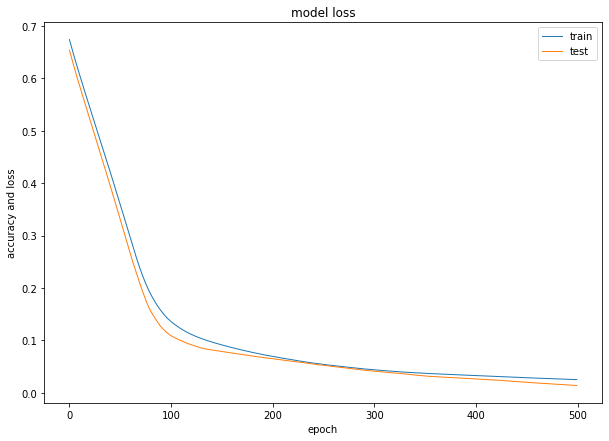

In [17]:
# Visualize the model loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

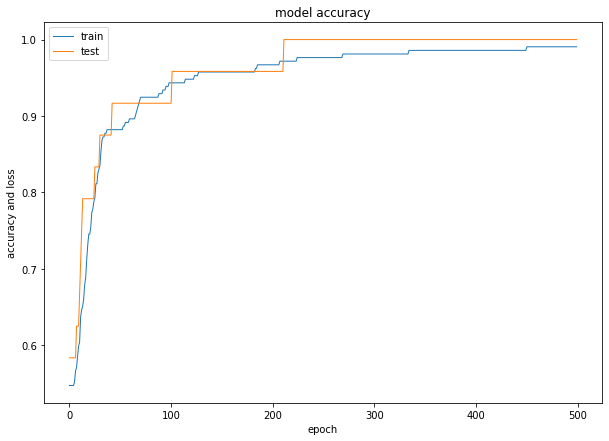

In [18]:
# Visualize the model accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [19]:
print("---------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("---------------------------------------------------------")

---------------------------------------------------------
Shape of training data:  (212, 9)
Shape of test data    :  (24, 9)
---------------------------------------------------------


In [20]:
for model_file in glob.glob("*.model"):
    print("Model file: ", model_file)
    model = load_model(model_file)
    pred = model.predict(X_test)
    pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
    scores = model.evaluate(X_test, y_test)
    print()
    print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
    print()
    print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
    print() 
    print("Scores    : loss = ", scores[0], " acc = ", scores[1])
    print("---------------------------------------------------------")
    print()

Model file:  ckd.model
24/24 [==============================] - 0s 9ms/sample - loss: 0.0137 - accuracy: 1.0000

Original  : 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0

Predicted : 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0

Scores    : loss =  0.013665661215782166  acc =  1.0
---------------------------------------------------------

